In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import sys
import trimesh
import random

sys.path.append(str(Path("..").resolve()))
from src import *

# Generate object renderings (ShapeNetCore)
 
This notebook uses Blender's Cycles rendering engine to produce multiple renderings of an object while the camera orbits around it. A HDR image is used as a light source.

In [2]:
dataset = ShapeNetCoreDataset3D()

In [ ]:
UID = random.choice(list(dataset.paths.keys()))
# UID = "42e9aff6647766ed265d1076b4b6c5c"
print(dataset.paths[UID])
obj = ShapeNetCoreObject3D(UID, dataset.paths[UID], type="obj")
if obj.has_one_mesh and len(obj.textures) == 1:
    renderings_obj = obj.render(samples=1, views=4, size=(512, 512), save_scene=Path("scene_obj.blend").resolve())
    obj = ShapeNetCoreObject3D(UID, dataset.paths[UID], type="glb")
    renderings_glb = obj.render(samples=1, views=4, size=(512, 512), save_scene=Path("scene_glb.blend").resolve())
else:
    log('Textures',len(obj.textures),"Meshes", len(obj.meshes))

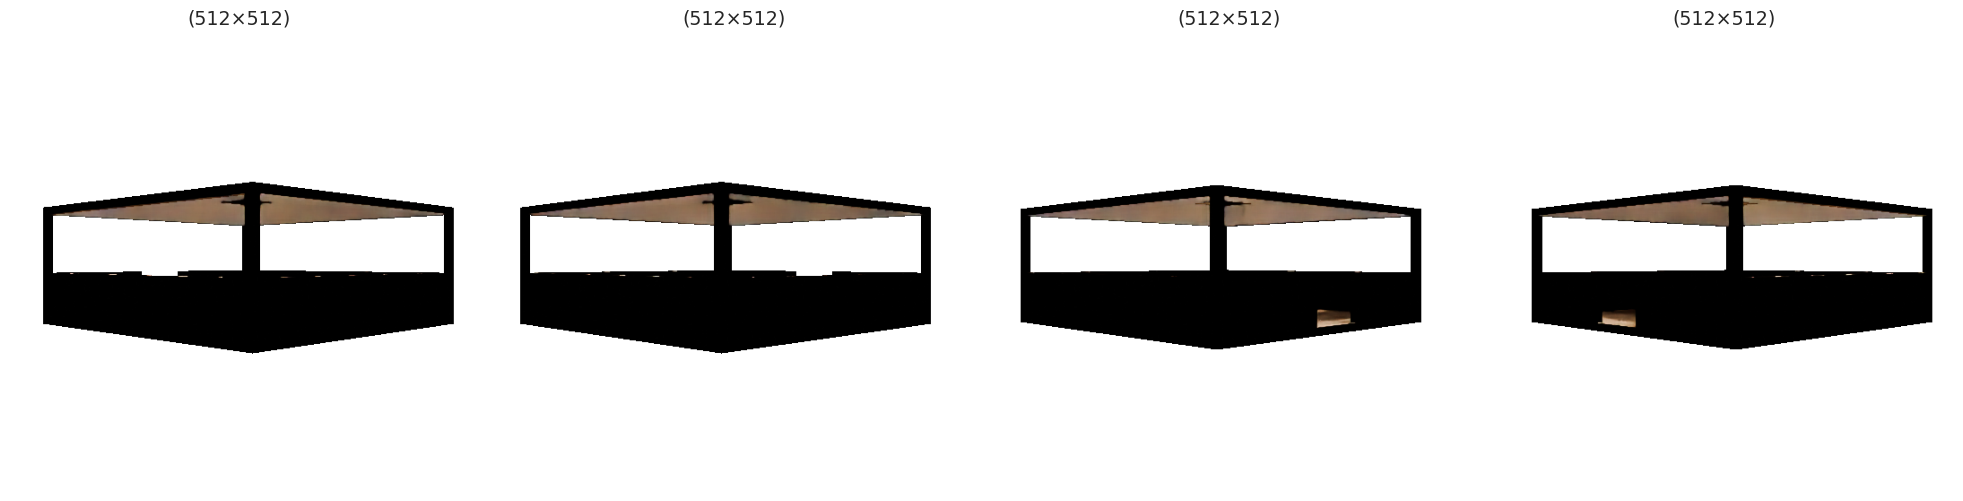

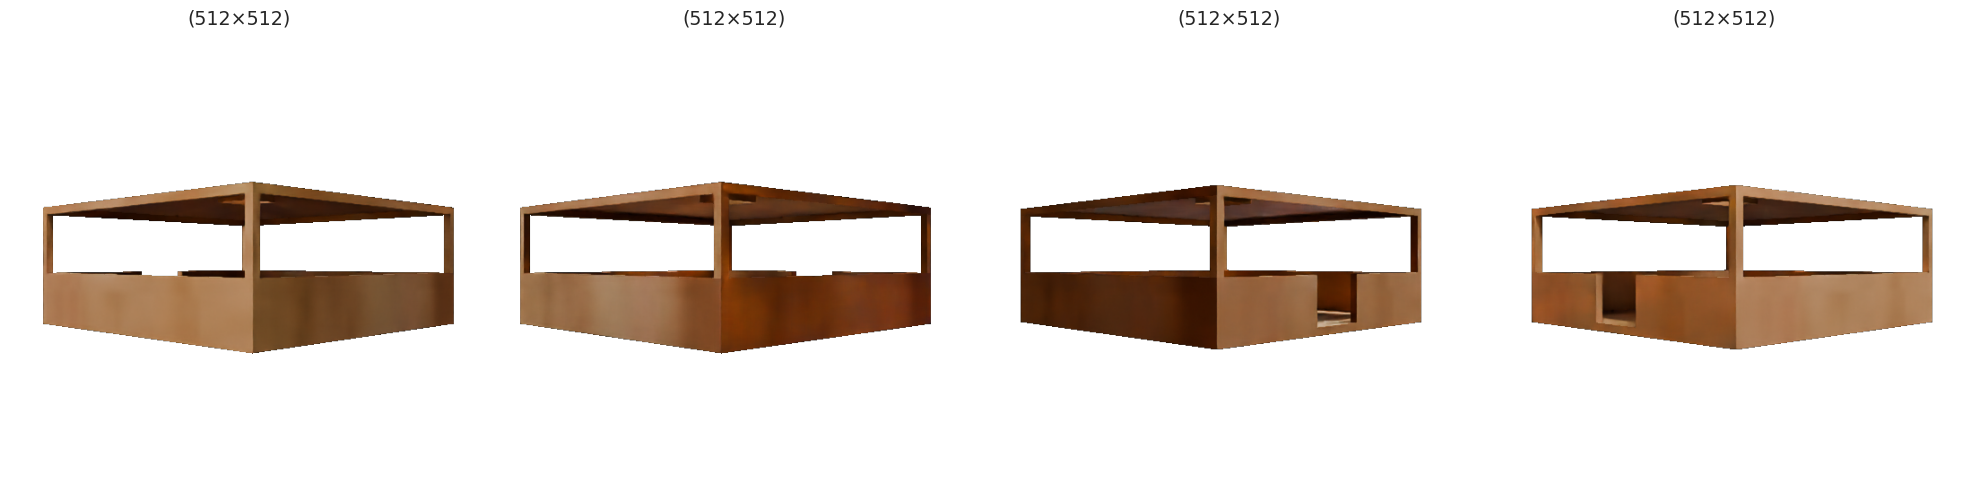

In [25]:
imshow(renderings_obj, cols=4,size=5)
imshow(renderings_glb, cols=4,size=5)

In [26]:
trimesh.load(obj.path).show()